In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sns.set_theme(style='whitegrid')

In [3]:
df = pd.read_csv('finaldata/finalLikertSLP.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,...,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46
0,5,5,2,5,5,5,4,5,2,5,...,1,5,5,2,4,5,5,2,3,1
1,4,4,4,5,5,2,4,4,4,4,...,2,5,2,4,4,4,4,4,5,1
2,5,4,4,4,5,2,4,5,5,5,...,2,3,5,3,4,4,4,4,5,1
3,4,4,4,4,4,4,4,4,2,2,...,2,4,4,3,2,4,4,2,4,4
4,5,5,5,5,5,4,5,2,2,5,...,1,5,2,5,5,4,5,2,2,1
5,5,2,5,3,5,4,2,1,4,3,...,3,4,1,5,5,3,5,4,1,2
6,5,4,3,4,4,4,4,3,4,3,...,3,4,3,3,5,5,3,3,1,1
7,5,5,5,4,5,3,4,2,4,3,...,1,4,2,4,5,3,4,2,3,1
8,5,5,2,4,5,4,5,2,3,4,...,1,5,2,4,5,5,5,3,2,1
9,3,5,3,4,5,2,5,2,5,2,...,1,5,1,5,5,3,3,4,1,2


In [4]:
knowledge_of_intervention = ['Q24', 'Q29', 'Q33','Q35', 'Q36', 'Q43']
religion = ['Q27', 'Q30', 'Q34', 'Q39', 'Q42', 'Q45']
socioeconomic_status = ['Q25', 'Q31', 'Q37', 'Q40', 'Q44', 'Q46']
stigmas_perception = ['Q23', 'Q26', 'Q28', 'Q32', 'Q38', 'Q41']

In [5]:
def getChart(questions, title):
    df = pd.read_csv('finaldata/likertSLP.csv')
    df = df[questions]
    table = df.describe().T
    sns.set(rc = {'figure.figsize':(8,8)})
    fig = sns.barplot(data=table, x=questions, y='mean').set(title=title)
    plt.savefig(f'finaldata/{title}.png')

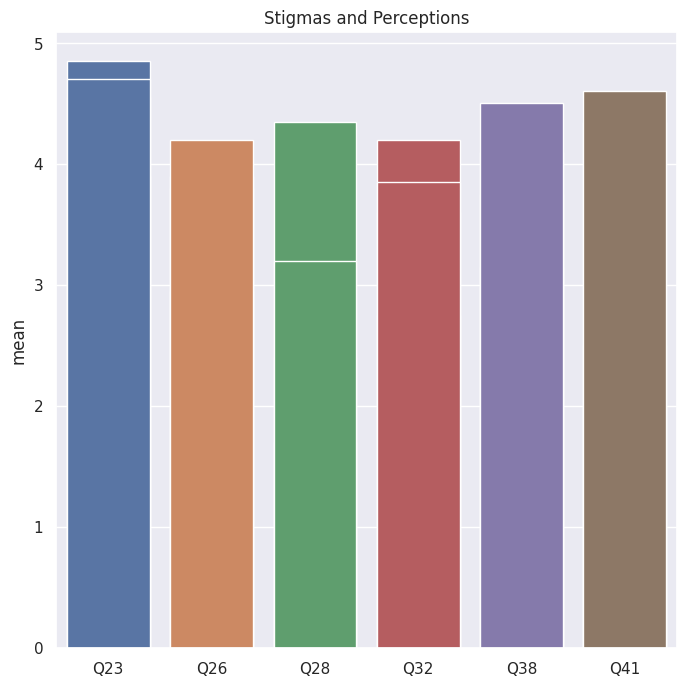

In [6]:
getChart(knowledge_of_intervention, 'Knowledge of Intervention')
getChart(religion, 'Religion')
getChart(socioeconomic_status, 'Socioeconomic Status')
getChart(stigmas_perception, 'Stigmas and Perceptions')

In [7]:
likert_score_knowledge = df[knowledge_of_intervention].sum()
likert_score_religion = df[religion].sum()

In [8]:
a = list(likert_score_knowledge.values)
b = list(likert_score_religion.values)

In [9]:
stats.kruskal(a,b)

KruskalResult(statistic=3.1134502923976677, pvalue=0.07764830999279326)